In [97]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

In [98]:
df = pd.read_excel("data_explore.xlsx")
df = df.drop(df.index[0])

# If you want to reset the index after dropping the row
df = df.reset_index(drop=True)
df.drop_duplicates(inplace=True)

c:\Users\ADMIN\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [99]:
# import datetime
# df['Tháng'] = pd.to_datetime(df['Tháng'])

In [100]:
df['Đã test'].value_counts()

Đã test
0.0    626
1.0    332
Name: count, dtype: int64

In [101]:
df['Đã test'] = df['Đã test'].replace({0.0: 'Không', 1.0: 'Có'})

Xử lý kênh liên lạc

In [102]:
df['Số điện thoại'] = df['Số điện thoại'].fillna('None')
df['Facebook'] = df['Facebook'].fillna('None')
df['Zalo'] = df['Zalo'].fillna('None')
df['Số điện thoại'] = df['Số điện thoại'].apply(lambda x: x if x == 'None' else 'SĐT')
df['Facebook'] = df['Facebook'].apply(lambda x: x if x == 'None' else 'Facebook')
df['Zalo'] = df['Zalo'].apply(lambda x: x if x == 'None' else 'Zalo')

# Gộp ba cột thành một cột mới 'Kênh liên lạc'
df['Kênh liên lạc'] = df['Số điện thoại'].fillna('None') + ', ' + df['Facebook'].fillna('None') + ', ' + df['Zalo'].fillna('None')

# Loại bỏ ba cột cũ
df.drop(['Số điện thoại', 'Facebook', 'Zalo'], axis=1, inplace=True)
df

,Ngày liên hệ,Nguồn,Tên Phụ huynh,Tên học sinh,Tuổi,Lớp,Tỉnh/Tp,Thông tin ban đầu,Giao cho nhân viên Sale,Trạng thái,...,Kế hoạch tiếp theo,Ngày chăm sóc tiếp theo,Ngày thu học phí,Khóa học cụ thể,Doanh thu danh nghĩa,Chiết khấu,Doanh thu thực thu,Tháng Liên hệ,Tháng đóng học phí,Kênh liên lạc
0,2023-05-01,Fanpage,Hương Suri,NaN,3.0,NaN,NaN,Liên hệ qua Fanpage,Thu,Từ chối,...,Ngừng chăm sóc,NaN,NaT,NaN,NaN,NaN,NaN,5.0,NaN,"SĐT, Facebook, None"
1,2023-05-01,Fanpage,Kiều Phan,Sỹ Quý,11.0,NaN,NaN,NaN,Thu,Từ chối,...,Ngừng chăm sóc,NaN,NaT,NaN,NaN,NaN,NaN,5.0,NaN,"SĐT, Facebook, None"
2,2023-05-06,Fanpage,Thúy Hà Lê,Bảo Ngọc,6.0,NaN,NaN,NaN,Linh,Từ chối,...,Ngừng chăm sóc,NaN,NaT,NaN,NaN,NaN,NaN,5.0,NaN,"SĐT, Facebook, None"
3,2023-05-08,Fanpage,Nguyễn Hiếu,Uyên Nhi,11.0,Home schooling,NaN,"CON mình 11t, mình muốn tư vấn về khóa học VUI",Duyên,Từ chối,...,Ngừng chăm sóc,NaN,2023-05-29,Phonics Fun,NaN,NaN,1000000,5.0,NaN,"SĐT, Facebook, Zalo"
4,2023-05-08,Data cũ,Thúy,Phan Văn Tùng,7.0,"2, sắp lên lớp 3",Đà Nẵng,NaN,Phương,Đã đóng học phí,...,Chốt,NaN,NaT,NaN,NaN,NaN,NaN,5.0,5.0,"SĐT, None, None"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2023-12-29,Fanpage,Hai Duong,NaN,NaN,NaN,NaN,data check,Ánh,NaN,...,Khai thác sau,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"SĐT, None, None"
954,2023-12-29,Fanpage,Minh Nguyên,NaN,NaN,NaN,NaN,data check,Ánh,NaN,...,Khai thác sau,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"SĐT, None, None"
955,2023-12-29,Fanpage,Ngocdungdl,NaN,NaN,NaN,NaN,data check,Ánh,NaN,...,Khai thác sau,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"SĐT, None, None"
956,2023-12-29,Fanpage,Hoai Tran,NaN,NaN,NaN,NaN,data check,Ánh,NaN,...,Khai thác sau,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"SĐT, None, None"


In [103]:
df['Tuổi'].fillna(df['Tuổi'].mode()[0],inplace=True)

In [104]:
# df.to_excel('data_visualize.xlsx',index=False)

In [105]:
df.isnull().sum()

Ngày liên hệ                                   6
Nguồn                                          0
Tên Phụ huynh                                 99
Tên học sinh                                 369
Tuổi                                           0
Lớp                                          578
Tỉnh/Tp                                      937
Thông tin ban đầu                            366
Giao cho nhân viên Sale                        0
Trạng thái                                     7
Đã test                                        0
KQ test đầu vào                              615
Đánh giá KQ quả trình độ sau test đầu vào    620
Khóa học                                     801
Lịch học                                     938
Nhật ký chăm sóc                              25
Kế hoạch tiếp theo                             1
Ngày chăm sóc tiếp theo                      803
Ngày thu học phí                             806
Khóa học cụ thể                              804
Doanh thu danh nghĩa

In [106]:
df_tree = df[['Nguồn', 'Tuổi', 'Giao cho nhân viên Sale', 'Kế hoạch tiếp theo', 'Đã test', 'Kênh liên lạc', 'Tháng Liên hệ']]

In [107]:
df_tree.isnull().sum()

Nguồn                       0
Tuổi                        0
Giao cho nhân viên Sale     0
Kế hoạch tiếp theo          1
Đã test                     0
Kênh liên lạc               0
Tháng Liên hệ              14
dtype: int64

In [108]:
df_tree.columns

Index(['Nguồn', 'Tuổi', 'Giao cho nhân viên Sale', 'Kế hoạch tiếp theo',
       'Đã test', 'Kênh liên lạc', 'Tháng Liên hệ'],
      dtype='object')

In [109]:
df_tree['Tuổi'].value_counts()

Tuổi
10.0    418
11.0     84
8.0      80
9.0      78
12.0     60
6.0      51
7.0      49
13.0     39
5.0      26
14.0     16
16.0     10
15.0      8
4.0       8
20.0      6
19.0      5
18.0      2
17.0      2
36.0      2
3.0       2
21.0      2
24.0      2
22.0      1
25.0      1
38.0      1
30.0      1
27.0      1
23.0      1
33.0      1
29.0      1
Name: count, dtype: int64

In [110]:
df_tree['Tuổi'].fillna(df_tree['Tuổi'].mode()[0],inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\3098932090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Tuổi'].fillna(df_tree['Tuổi'].mode()[0],inplace=True)


In [111]:
df_tree['Tháng Liên hệ'].fillna(df_tree['Tháng Liên hệ'].mode()[0],inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\3655962770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Tháng Liên hệ'].fillna(df_tree['Tháng Liên hệ'].mode()[0],inplace=True)


In [112]:
df_tree['Kế hoạch tiếp theo'].fillna('Từ chối',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\3633013020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Kế hoạch tiếp theo'].fillna('Từ chối',inplace=True)


In [113]:
df_tree['Kế hoạch tiếp theo'].value_counts()

Kế hoạch tiếp theo
Ngừng chăm sóc    387
Chăm sóc tiếp     333
Chốt              152
Khai thác sau      85
Từ chối             1
Name: count, dtype: int64

In [114]:
# Sử dụng .loc để thay đổi dữ liệu dựa trên điều kiện
df_tree.loc[df_tree['Kế hoạch tiếp theo'].isin(['Chăm sóc tiếp', 'Khai thác sau', 'Ngừng chăm sóc']), 'Kế hoạch tiếp theo'] = 'Từ chối'
df_tree.loc[df_tree['Kế hoạch tiếp theo'] == 'Chốt', 'Kế hoạch tiếp theo'] = 'Chốt'

# Đếm số lượng các giá trị mới
df_tree['Kế hoạch tiếp theo'].value_counts()

Kế hoạch tiếp theo
Từ chối    806
Chốt       152
Name: count, dtype: int64

In [115]:

df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.strip()
df_tree['Kênh liên lạc'].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\274072004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.strip()


Kênh liên lạc
SĐT, None, None         900
SĐT, None, Zalo          23
None, None, None         16
SĐT, Facebook, None      10
None, Facebook, None      6
SĐT, Facebook, Zalo       2
None, None, Zalo          1
Name: count, dtype: int64

In [116]:
# hàm chuyển đổi từ multi-value column thành dummy-value columns
def multi_to_dummy(dataframe, column, pref=None, seperator=' '):
    # convert into list type data
    split_col = dataframe[column].str.split(seperator)
    # get dummy and group
    df_dummy = pd.get_dummies(split_col.apply(pd.Series).stack(), prefix=pref).groupby(level=0).sum()
    return df_dummy 

In [117]:
mask = df_tree['Kênh liên lạc'] == 'None, None, None'

# Thay thế bằng 'SĐT'
df_tree.loc[mask, 'Kênh liên lạc'] = 'SĐT'
df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace('  ', '', regex=False)
df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace(' ,', '', regex=False)   # Xóa ' ,' nếu tồn tại
df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace(',', '', regex=False) 
df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace('None', '', regex=False) 
# Xóa khoảng trắng ở đầu hoặc cuối
df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.strip()
new_df = multi_to_dummy(df_tree,'Kênh liên lạc',pref=None, seperator=' ')
new_df


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\929747708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace('  ', '', regex=False)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\929747708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Kênh liên lạc'] = df_tree['Kênh liên lạc'].str.replace(' ,', '', regex=False)   # Xóa ' ,' nếu tồn tại
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5300\929747708.py:7: SettingWithCopyWarning: 
A

,,Facebook,SĐT,Zalo
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,1
4,0,0,1,0
...,...,...,...,...
953,0,0,1,0
954,0,0,1,0
955,0,0,1,0
956,0,0,1,0


In [118]:
df_tree = pd.concat([df_tree, new_df], axis=1).drop(columns=['Kênh liên lạc',''])
df_tree.head(3)

,Nguồn,Tuổi,Giao cho nhân viên Sale,Kế hoạch tiếp theo,Đã test,Tháng Liên hệ,Facebook,SĐT,Zalo
0,Fanpage,3.0,Thu,Từ chối,Không,5.0,1,1,0
1,Fanpage,11.0,Thu,Từ chối,Có,5.0,1,1,0
2,Fanpage,6.0,Linh,Từ chối,Không,5.0,1,1,0


In [119]:
df_tree['Giao cho nhân viên Sale'].unique()

array(['Thu', 'Linh', 'Duyên ', 'Phương', 'Loan', 'Ánh', 'Cúc', 'Yến',
       'Thảo'], dtype=object)

In [120]:
df_tree['Nguồn'].unique()

array(['Fanpage', 'Data cũ', 'Hotline', 'Người quen', 'HV giới thiệu',
       'Đến trung tâm', 'Data mua', 'Seeding', 'Website'], dtype=object)

Label encoder


In [121]:
columns = ['Nguồn','Giao cho nhân viên Sale','Kế hoạch tiếp theo','Đã test']
encoded_mapping = {}
for col in columns:
    label_encoder = LabelEncoder()
    df_tree[col] = label_encoder.fit_transform(df_tree[col])
    encoded_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# df_tree
for col, mapping in encoded_mapping.items():
    print(f"Bảng mã hóa cho cột '{col}':")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")
    print()

Bảng mã hóa cho cột 'Nguồn':
  Data cũ -> 0
  Data mua -> 1
  Fanpage -> 2
  HV giới thiệu -> 3
  Hotline -> 4
  Người quen -> 5
  Seeding -> 6
  Website -> 7
  Đến trung tâm -> 8

Bảng mã hóa cho cột 'Giao cho nhân viên Sale':
  Cúc -> 0
  Duyên  -> 1
  Linh -> 2
  Loan -> 3
  Phương -> 4
  Thu -> 5
  Thảo -> 6
  Yến -> 7
  Ánh -> 8

Bảng mã hóa cho cột 'Kế hoạch tiếp theo':
  Chốt -> 0
  Từ chối -> 1

Bảng mã hóa cho cột 'Đã test':
  Có -> 0
  Không -> 1



In [122]:
encoded_mapping

{'Nguồn': {'Data cũ': 0,
  'Data mua': 1,
  'Fanpage': 2,
  'HV giới thiệu': 3,
  'Hotline': 4,
  'Người quen': 5,
  'Seeding': 6,
  'Website': 7,
  'Đến trung tâm': 8},
 'Giao cho nhân viên Sale': {'Cúc': 0,
  'Duyên ': 1,
  'Linh': 2,
  'Loan': 3,
  'Phương': 4,
  'Thu': 5,
  'Thảo': 6,
  'Yến': 7,
  'Ánh': 8},
 'Kế hoạch tiếp theo': {'Chốt': 0, 'Từ chối': 1},
 'Đã test': {'Có': 0, 'Không': 1}}

In [123]:
import json

# Dữ liệu mẫu
encoding_dict = {
    'Nguồn': {
        'Data cũ': 0, 'Data mua': 1, 'Fanpage': 2, 'HV giới thiệu': 3,
        'Hotline': 4, 'Người quen': 5, 'Seeding': 6, 'Website': 7, 'Đến trung tâm': 8
    },
    'Giao cho nhân viên Sale': {
        'Cúc': 0, 'Duyên ': 1, 'Linh': 2, 'Loan': 3, 'Phương': 4,
        'Thu': 5, 'Thảo': 6, 'Yến': 7, 'Ánh': 8
    },
    'Kế hoạch tiếp theo': {'Chốt': 0, 'Từ chối': 1},
    'Đã test': {'Có': 0, 'Không': 1},
    'Facebook':{'Có':1,'Không':0},
    'SĐT':{'Có':1,'Không':0},
    'Zalo':{'Có':1,'Không':0}
}

# Lưu vào tệp JSON
with open('encoding_mapping.json', 'w', encoding='utf-8') as file:
    json.dump(encoding_dict, file, ensure_ascii=False, indent=4)
# Đọc dữ liệu từ tệp JSON
with open('encoding_mapping.json', 'r', encoding='utf-8') as file:
    encoding_mapping = json.load(file)

# Ví dụ: Mã hóa dữ liệu mới
def encode_value(column, value):
    if column in encoding_mapping and value in encoding_mapping[column]:
        return encoding_mapping[column][value]
    else:
        return None  # Giá trị không tồn tại trong bảng mã hóa

# Sử dụng hàm để mã hóa giá trị mới
new_data = {
    'Nguồn': 'Fanpage',
    'Giao cho nhân viên Sale': 'Thu',
    'Kế hoạch tiếp theo': 'Chốt',
    'Đã test': 'Có'
}

encoded_data = {col: encode_value(col, val) for col, val in new_data.items()}
print(encoded_data)


{'Nguồn': 2, 'Giao cho nhân viên Sale': 5, 'Kế hoạch tiếp theo': 0, 'Đã test': 0}


In [124]:
encoding_dict = {
    'Data cũ': 0, 'Data mua': 1, 'Fanpage': 2, 'HV giới thiệu': 3,
    'Hotline': 4, 'Người quen': 5, 'Seeding': 6, 'Website': 7, 'Đến trung tâm': 8,
    'Cúc': 0, 'Duyên ': 1, 'Linh': 2, 'Loan': 3, 'Phương': 4,
    'Thu': 5, 'Thảo': 6, 'Yến': 7, 'Ánh': 8,
    'Chốt': 0, 'Từ chối': 1,
    'Có': 0, 'Không': 1
}

# Hàm để tra cứu bảng mã hóa
def map_value(value):
    return encoding_dict.get(value, None)  # Trả về `None` nếu không tìm thấy trong bảng mã hóa

# Dữ liệu mới cần ánh xạ
new_data = ['Fanpage', 'Loan', 'Chốt', 'Có', 'Không', 'Website']

# Ánh xạ dữ liệu mới bằng cách sử dụng hàm `map_value`
mapped_data = [map_value(value) for value in new_data]

# Hiển thị dữ liệu đã được ánh xạ
print(mapped_data)

[2, 3, 0, 0, 1, 7]


Desicions Tree

In [125]:
# X = df_tree.drop('Kế hoạch tiếp theo', axis=1)
# y = df_tree['Kế hoạch tiếp theo']

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra(train 80% , test 20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = df_tree.drop('Kế hoạch tiếp theo', axis=1)
new_order = ['Nguồn', 'Giao cho nhân viên Sale', 'Đã test', 'Facebook', 'SĐT', 'Zalo', 'Tuổi', 'Tháng Liên hệ']
X = X[new_order]
y = df_tree['Kế hoạch tiếp theo']

# Khởi tạo mô hình DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Sử dụng KFold để chia dữ liệu
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Lặp qua từng fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình trên tập huấn luyện
    clf.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = clf.predict(X_test)

    # Đánh giá độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# In độ chính xác trung bình sau tất cả các lần lặp
print("Mean Accuracy: {:.2f}%".format(100 * np.mean(accuracies)))


Mean Accuracy: 83.72%


In [127]:
X_test

,Nguồn,Giao cho nhân viên Sale,Đã test,Facebook,SĐT,Zalo,Tuổi,Tháng Liên hệ
1,2,5,0,1,1,0,11.0,5.0
13,2,8,1,0,1,0,10.0,5.0
20,0,2,0,0,1,0,11.0,5.0
21,0,8,1,0,1,1,7.0,5.0
34,2,1,1,0,1,0,10.0,5.0
...,...,...,...,...,...,...,...,...
875,6,8,1,0,1,0,10.0,10.0
896,2,8,1,0,1,0,11.0,11.0
938,2,8,1,0,1,0,9.0,12.0
940,2,8,1,0,1,0,10.0,12.0


In [128]:
import numpy as np
features = ['Fanpage', 'Thu', 'Có','Có','Không','Không']
nume = [15,3]
mapped_data = [map_value(value) for value in features]
all_features = np.hstack((mapped_data,nume))

prediction = clf.predict(all_features.reshape(1, -1))
prediction

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [129]:
all_features

array([ 2,  5,  0,  0,  1,  1, 15,  3])

In [130]:
all_features.reshape(1, -1)

array([[ 2,  5,  0,  0,  1,  1, 15,  3]])

In [131]:
import joblib
joblib.dump(clf,'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [132]:
# Hiển thị gain ratio cho mỗi đặc trưng
gain_ratios = clf.feature_importances_
for i, ratio in enumerate(gain_ratios):
    print(f"Feature {i}: Gain Ratio = {ratio}")

Feature 0: Gain Ratio = 0.09142869705542836
Feature 1: Gain Ratio = 0.11803250802518282
Feature 2: Gain Ratio = 0.3919250759002415
Feature 3: Gain Ratio = 0.0036687693580724967
Feature 4: Gain Ratio = 0.0
Feature 5: Gain Ratio = 0.006819701395666669
Feature 6: Gain Ratio = 0.22491331812785062
Feature 7: Gain Ratio = 0.16321193013755753


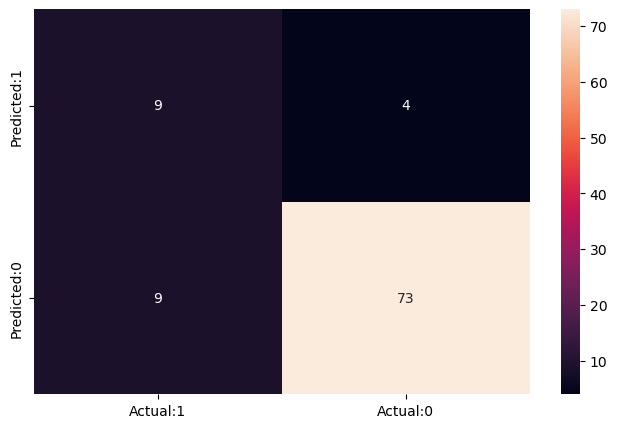

In [133]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:1','Actual:0'],index=['Predicted:1','Predicted:0'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [134]:
# # Vẽ cây quyết định
# dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True)
# graph = graphviz.Source(dot_data)
# graph.render("heart_treec_4.5")